<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/070_correlation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(correlation-causation-notebook)=
# Correlazione e causazione

Per garantire che i modelli statistici forniscano intuizioni scientificamente valide, è essenziale che siano supportati da modelli scientifici aggiuntivi, specificatamente modelli causali. Le fondamenta di un'analisi statistica non risiedono nei dati in sé, ma piuttosto nelle cause che hanno prodotto tali dati. Queste cause, tuttavia, non sono direttamente deducibili dai soli dati. In altre parole, senza l'inclusione di informazioni causali nel modello, non è possibile estrarre conclusioni causali dai dati.

Questo principio sottolinea l'importanza di integrare l'analisi statistica con un contesto causale per ottenere una comprensione più profonda dei fenomeni studiati. Mentre l'analisi statistica può identificare correlazioni e tendenze all'interno dei dati, la comprensione dei meccanismi sottostanti richiede una considerazione attenta delle cause che hanno portato a tali risultati. In sintesi, per una comprensione completa e scientificamente robusta, è cruciale abbinare i modelli statistici con un'analisi delle cause che li hanno generati.

Nel corso di questo capitolo, esploriamo la distinzione fondamentale tra correlazione e causalità, due concetti chiave nell'analisi dei dati. La correlazione descrive la relazione tra due variabili in termini di forza e direzione, ma non implica automaticamente un legame di causa-effetto. L'affermazione "correlazione non implica causalità" sottolinea l'importanza di non confondere queste due nozioni. Esempi di correlazioni apparentemente significative, ma prive di legami causali, sono disponibili sul sito [spurious correlations](https://tylervigen.com/spurious-correlations).

Proseguendo, indagheremo come la correlazione si manifesti in vari contesti causali, quali biforcazioni, catene, collider e strutture discendenti. Questa analisi enfatizza il pericolo di interpretazioni errate, evidenziando l'importanza di distinguere tra correlazione e causalità. Approfondiremo il tema attraverso l'esame di indici statistici come la covarianza e l'analisi dell'impatto dei fattori confondenti. Andremo oltre l'analisi delle semplici relazioni bivariate, per esaminare dinamiche più complesse tra le variabili. Questo approccio ci fornirà strumenti cruciali per un'interpretazione precisa dei dati, aiutandoci a evitare gli errori comuni che possono derivare dalla confusione tra correlazione e causalità.

## Preparazione del Notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az
import graphviz

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Introduzione alla Ricerca Causale 

L'inferenza causale è un processo cruciale nella previsione degli effetti di un intervento. Essa non solo permette di anticipare le conseguenze di una causa, ma anche di costruire scenari controfattuali, immaginando gli esiti alternativi che sarebbero potuti accadere se fossero state prese decisioni diverse. Questo tipo di ragionamento si rivela fondamentale anche in contesti puramente descrittivi, come nell'analisi di un campione di studio rispetto alla popolazione generale. Per comprendere le ragioni di eventuali discrepanze tra campione e popolazione, è necessario adottare un approccio causale che vada oltre la semplice descrizione dei dati, fornendo un modello causale che spieghi le differenze osservate.

{cite:t}`McElreath_rethinking` utilizza l'analogia dei Golem, robot di argilla potenti ma privi di saggezza e previsione, per descrivere un approccio limitante che è stato a lungo lo standard in psicologia. 

```{figure} ../images/mcelreath_golem.png
---
height: 600px
name: golem-fig
---
Esempio di albero decisionale per la selezione di una procedura statistica appropriata. Iniziando dall'alto, l'utente risponde a una serie di domande riguardanti la misurazione e l'intento, arrivando infine al nome di una procedura. Sono possibili molti alberi decisionali simili.  (Figura tratta da {cite:t}`McElreath_rethinking`).
```

Questo approccio si concentra sulla semplice confutazione delle ipotesi nulle e non stabilisce una relazione chiara tra ricerca e test. Tale limitazione può essere considerata una delle cause principali della crisi della replicabilità dei risultati nella ricerca psicologica e, di conseguenza, una crisi della psicologia stessa.

{cite:t}`McElreath_rethinking` sottolinea che processi causali completamente diversi possono produrre distribuzioni simili di risultati osservati, evidenziando i limiti di un approccio che si concentra solo sul test di ipotesi nulle. Questo "Golem" nella data science è caratterizzato da un basso potere di rilevazione (incapacità di scoprire le caratteristiche importanti dei fenomeni studiati) e da un alto tasso di falsi positivi, portando a conclusioni errate basate su dati che in realtà contengono solo rumore di misurazione [per es., {cite_p}`van2023new`].

La ricerca richiede più di semplici "robot" che confutano le ipotesi nulle. È necessario sviluppare modelli causali generativi e modelli statistici che siano giustificati da questi modelli generativi e dalle domande di ricerca. Per ottenere stime accurate, è essenziale avere un modello generativo che guidi la progettazione e la verifica dell'inferenza. È inoltre cruciale avere una strategia ben definita per derivare stime e quantificare l'incertezza associata. In questo contesto, l'analisi bayesiana dei dati si presenta come un approccio altamente efficace. In analisi semplici, le differenze rispetto all'approccio del "Golem" potrebbero sembrare minime e potrebbero addirittura introdurre complicazioni, ma quando ci si confronta con analisi più realistiche, la differenza è sostanziale.

Per un'analisi scientifica dei dati che vada oltre l'approccio "amatoriale" dei "Golem", {cite:t}`McElreath_rethinking` suggerisce i seguenti punti:

1. Comprendere appieno il concetto teorico che si sta cercando di stimare. Questo richiede una solida base teorica e una chiara definizione dell'oggetto dell'analisi.

2. Costruire modelli scientifici o causali che descrivano le relazioni tra le variabili coinvolte nel problema di ricerca. Questi modelli dovrebbero essere basati sulla teoria e sull'esperienza.

3. Utilizzare le informazioni ottenute dai primi due passaggi per sviluppare modelli statistici appropriati. Questi modelli dovrebbero riflettere accuratamente il contesto scientifico.

4. Eseguire simulazioni basate sui modelli causali per verificare se i modelli statistici costruiti sono in grado di stimare correttamente ciò che è teoricamente atteso.

5. Alla fine, condurre l'analisi dei dati reali in base ai modelli statistici sviluppati, avendo la fiducia che questi modelli riflettano le teorie sottostanti.

In questo approccio, {cite:t}`McElreath_rethinking` utilizza i DAG ("Directed Acyclic Graphs") come rappresentazione grafica dei modelli causali. Questi grafici servono a rendere trasparenti le assunzioni scientifiche alla base dell'analisi, consentendo così una critica utile e una connessione tra le teorie e l'analisi statistica. In contrasto, i "Golems" sono degli strumenti statistici potenti ma privi di una base teorica o causale, e vengono utilizzati senza una chiara comprensione delle relazioni sottostanti tra le variabili.

### I Disegni di Ricerca e la Causalità

Per comprendere meglio l'uso dei DAG (Directed Acyclic Graphs) nell'inferenza causale, è utile esaminare un articolo di {cite:p}`rohrer2018thinking` relativo alla ricerca sulla causalità nei disegni osservazionali.

**Disegni Osservazionali**
Nei disegni osservazionali, i ricercatori osservano e registrano gli eventi senza intervenire direttamente. A differenza degli esperimenti controllati, qui non si manipolano le variabili studiate, ma si osservano le relazioni naturali che emergono. Questi studi sono preziosi quando gli esperimenti non sono fattibili per motivi etici o pratici. Tuttavia, i disegni osservazionali, sebbene efficaci nell'identificare correlazioni e tendenze, spesso mancano della capacità di stabilire con certezza relazioni causali, a causa di variabili confondenti e bias di selezione. Esempi comuni di disegni osservazionali includono studi trasversali e longitudinali.

**Disegni Sperimentali**
I disegni sperimentali, d'altra parte, si basano sulla manipolazione controllata delle variabili e sulla randomizzazione. Quest'ultima, ovvero l'assegnazione casuale dei partecipanti ai gruppi, è fondamentale per ridurre i bias e garantire la validità delle conclusioni causali. Gli esperimenti randomizzati sono considerati il gold standard per indagare le relazioni causali, poiché la randomizzazione equilibra le variabili osservate e non osservate tra i gruppi di trattamento.

**Confronto e Considerazioni**
Mentre gli esperimenti offrono maggiore certezza nella determinazione delle relazioni causali, i disegni osservazionali forniscono flessibilità e applicabilità in contesti in cui gli esperimenti non sono possibili o etici. Tuttavia, i disegni osservazionali spesso si basano su relazioni associative piuttosto che causali.

**Definizione e Contesto della Causalità**
Nel contesto della ricerca, la causalità si riferisce a come una variabile (X) possa influenzare o determinare un'altra variabile (Y). Il linguaggio causale utilizza termini come "causa", "influenza", "determina", a differenza dei termini descrittivi come "associato" o "correlato", che vengono utilizzati per descrivere relazioni senza implicazioni causali dirette. La causalità è concepita come un concetto probabilistico: una modifica in X aumenta la probabilità di un certo esito in Y, piuttosto che determinarlo in modo rigido.

Nella pratica psicologica e sociale, spesso si cerca di inferire relazioni causali da dati osservazionali poiché gli esperimenti randomizzati non sono sempre fattibili o etici. Pertanto, i ricercatori devono affrontare sfide e limitazioni, cercando di inferire relazioni causali in modi alternativi.

**Strategie di Ricerca nei Dati Osservazionali**
Nella ricerca con dati osservazionali, esistono vari limiti che possono influenzare la qualità e l'accuratezza delle conclusioni. I ricercatori adottano diverse strategie per mitigare queste limitazioni e migliorare la validità dei loro studi.

1. **Uso di interventi surrogati**: Gli interventi surrogati vengono utilizzati quando non è possibile o etico condurre esperimenti diretti. Invece di manipolare direttamente una variabile, i ricercatori osservano gli effetti di una variabile surrogata che si ritiene abbia una relazione con la variabile di interesse. Questo approccio può aiutare a stabilire legami indiretti, ma presenta delle limitazioni poiché non sempre è possibile garantire una correlazione diretta e significativa tra la variabile surrogata e la variabile principale.

2. **Linguaggio prudente nell'interpretazione dei dati**: È importante utilizzare un linguaggio cauto, specialmente quando si interpretano dati osservazionali. Ciò significa evitare di fare affermazioni causali dirette quando i dati mostrano solo correlazioni. La distinzione tra correlazione e causalità è fondamentale, poiché la presenza di una correlazione non implica necessariamente un rapporto di causa-effetto.

3. **Utilizzo di metodi statistici avanzati per controllare variabili confondenti**: Le variabili confondenti sono fattori esterni che possono influenzare il rapporto tra le variabili studiate. L'uso di tecniche statistiche avanzate, come la regressione multivariata o l'analisi di matching, aiuta a controllare l'effetto di queste variabili confondenti, permettendo una stima più accurata del rapporto tra le variabili di interesse. Tuttavia, anche questi metodi hanno limiti poiché potrebbero non riuscire a controllare completamente tutte le variabili confondenti, soprattutto in situazioni complesse.

Nonostante l'adozione di queste strategie, persistono sfide in termini di validità esterna (cioè la generalizzabilità dei risultati) e interpretazione dei dati. La validità esterna può essere limitata poiché le condizioni specifiche dello studio potrebbero non rappresentare situazioni più ampie o diverse. Inoltre, l'interpretazione dei risultati può essere complicata dalla natura indiretta o surrogata delle evidenze raccolte.

È essenziale quindi affrontare l'analisi dei dati osservazionali con un approccio critico e metodologicamente rigoroso, consapevoli dei limiti degli studi osservazionali e interpretando i risultati con cautela. La chiarezza nell'esposizione dei metodi e delle limitazioni dello studio è cruciale per garantire che le conclusioni siano valide e affidabili.

## Modelli Causali Grafici

Per rafforzare la validità delle inferenze causali ottenute da dati osservazionali, {cite:t}`rohrer2018thinking` suggerisce l'impiego dei Grafici Aciclici Diretti (DAGs). Questi strumenti, sviluppati in larga parte dallo scienziato informatico Judea Pearl, servono a fornire rappresentazioni visive delle ipotesi causali. I DAGs condividono molti aspetti con i modelli di equazioni strutturali (SEM), ma si distinguono per la loro capacità di illustrare direttamente le relazioni causali.

Una caratteristica fondamentale dei DAGs è la loro efficacia nell'identificare quali variabili esterne (spesso denominate 'variabili terze') dovrebbero essere considerate o escluse durante l'analisi. Questo aspetto è cruciale perché il controllo inadeguato o eccessivo di queste variabili può condurre a inferenze errate. In particolare, i DAGs sono utili per determinare in quali situazioni il controllo statistico delle variabili terze può effettivamente migliorare l'accuratezza dell'inferenza causale, e in quali altri casi tale controllo potrebbe invece introdurre distorsioni o errori.

Attraverso l'uso di DAGs, gli scienziati e i ricercatori possono quindi sviluppare una comprensione più profonda e accurata delle relazioni causali nei loro dati, evitando gli errori comuni che possono emergere nell'interpretazione di dati osservazionali.

### Importanza delle Assunzioni

Le strategie per affrontare i problemi di inferenza causale si basano fondamentalmente sulle ipotesi riguardanti le relazioni causali tra le variabili di interesse. È essenziale riconoscere che non è possibile dedurre relazioni causali direttamente dalla correlazione senza disporre di conoscenze pregresse. Questo principio deriva dal fatto che la correlazione tra due variabili potrebbe essere il risultato di una varietà di fattori, inclusa la possibilità che entrambe siano influenzate da una terza variabile non considerata. Pertanto, senza una comprensione preliminare delle possibili relazioni causali, qualsiasi inferenza causale potrebbe essere erronea.

Nonostante questa limitazione, è importante non scoraggiarsi nell'ambito della ricerca osservazionale. Gli studi osservazionali, pur non potendo stabilire con certezza la causalità a causa della loro natura non sperimentale, rimangono uno strumento fondamentale per generare ipotesi e guidare ulteriori ricerche. Inoltre, anche gli studi sperimentali, che sono considerati il gold standard per l'indagine causale, non sono esenti da presupposti. Ad esempio, gli esperimenti condotti in ambienti controllati, come quelli di laboratorio, richiedono l'assunzione che i risultati ottenuti possano essere generalizzati a contesti più ampi o alla vita quotidiana, il che non è sempre garantito.

L'aspetto cruciale in entrambi gli approcci, osservazionali e sperimentali, è la consapevolezza e la comunicazione trasparente delle assunzioni sottostanti. Questa pratica permette ai ricercatori e alla comunità scientifica di effettuare valutazioni critiche delle affermazioni causali presentate. Inoltre, una chiara esposizione delle ipotesi impiegate pone le basi per dibattiti scientifici costruttivi e produttivi, consentendo al campo della ricerca di avanzare in modo più informato ed efficace.

## Introduzione ai DAG

I DAGs vengono impiegati per analizzare l'effetto causale di una variabile su un'altra. Consideriamo l'effetto dell'istruzione sul reddito come esempio {cite:p}`rohrer2018thinking`. Immaginiamo di dividere il livello di istruzione in due categorie: laurea o nessuna laurea entro i 30 anni. Successivamente, misuriamo il reddito a 40 anni. Ora, è importante sottolineare che non possiamo dedurre direttamente che il possesso di una laurea causa un aumento del reddito, poiché esistono numerose altre variabili che possono influenzare il reddito.

I DAGs ci aiutano a visualizzare questa complessa rete di relazioni causali in modo chiaro. In un DAG, le frecce rappresentano le relazioni causali tra le variabili, e l'assenza di cicli garantisce che le relazioni siano direzionali, ovvero vanno da una variabile all'altra senza creare loop causali.

Nel nostro esempio, il livello di istruzione può influenzare il reddito, ma ci sono anche altri fattori da considerare, come l'intelligenza, ad esempio. Un DAG ci permetterà di rappresentare queste relazioni in modo preciso, mostrando come il livello di istruzione può avere un impatto indiretto sul reddito attraverso altre variabili.

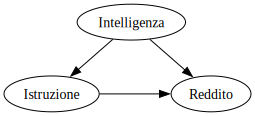

In [12]:
f = graphviz.Digraph()
f.attr(ranksep="0.5")  # Aumenta la separazione tra i livelli
f.attr(nodesep="1.0")  # Aumenta la separazione tra i nodi sullo stesso livello

# Crea un subgraph con lo stesso rank
with f.subgraph() as s:
    s.attr(rank="same")
    # Aggiungi i nodi al subgraph
    s.node("Istruzione")
    s.node("Reddito")

# Definisci le relazioni tra i nodi
f.edge("Intelligenza", "Istruzione")
f.edge("Intelligenza", "Reddito")
f.edge("Istruzione", "Reddito")

# Visualizza il grafico
f

Nel DAG illustrato nella figura precedente, l'interazione tra il livello di istruzione e il reddito è complicata da una variabile comune, cioè l'intelligenza. Il modello causale che emerge da questo DAG suggerisce che l'intelligenza influenzi sia il livello di istruzione che il reddito. Queste ipotesi di causalità sono rappresentate dalle frecce che si estendono dall'intelligenza alle altre variabili nel diagramma. Inoltre, notiamo che c'è una freccia che collega direttamente il livello di istruzione al reddito, indicando che, oltre all'effetto causale dell'intelligenza, si assume che anche il livello di istruzione abbia un impatto causale diretto sul reddito.

Questo DAG è utile perché ci consente di visualizzare le relazioni causali complesse tra queste variabili in modo chiaro e conciso. In particolare, evidenzia il ruolo cruciale dell'intelligenza come fattore influente sia sull'istruzione sia sul reddito, oltre a rivelare la relazione diretta tra il livello di istruzione e il reddito.

### Caratteristiche dei DAG

I DAG sono rappresentazioni grafiche che illustrano le relazioni causali ipotizzate tra variabili. In un DAG, ogni nodo rappresenta una variabile, mentre le frecce indicano le relazioni causali tra di esse. La manipolazione sperimentale di una variabile all'origine di una freccia (per esempio, l'intervento sul livello di istruzione) si presume abbia effetti sulla variabile a cui la freccia punta (in questo caso, il reddito). In un DAG, ogni variabile deve essere collegata tramite una freccia ad almeno un'altra variabile verso cui esercita un inflenza causale; la direzione della freccia stabilisce la direzione di tale relazione causale.

I DAG sono considerati strumenti qualitativi: una freccia che va da A a B indica che A ha un qualche tipo di effetto su B, ma non specifica la natura esatta o l'intensità di questa relazione. Diversamente dai modelli di equazioni strutturali (SEM), i DAG non includono frecce bidirezionali, ma solo monodirezionali, per sottolineare la direzione univoca dell'influenza causale.

### Rappresentazione dei Legami Non-Causali

In alcune situazioni, può verificarsi una correlazione tra due variabili senza che vi sia una relazione causale diretta tra di loro. Questa correlazione può essere dovuta a una causa comune non specificata, indicata come "U". Per rappresentare questa situazione nei Diagrammi Aciclici Diretti (DAG), si potrebbe utilizzare una freccia doppia tra due variabili, ad esempio, A ↔ B. Tuttavia, nei DAG la notazione precedente interpretata come un'abbreviazione di A ← U → B, che include ancora frecce unidirezionali.

I DAG sono costituiti da una serie di nodi e frecce che vengono impiegati per visualizzare situazioni più intricate e per tracciare percorsi causali tra le variabili. Per esemplificare ulteriormente questo concetto, nel DAG presente nella figura successiva, abbiamo introdotto un nuovo nodo, "voti scolastici", che è influenzato dall'intelligenza e, a sua volta, influisce sul livello di istruzione.

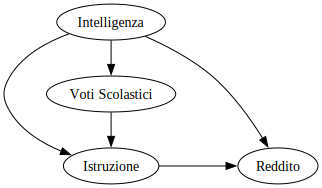

In [15]:
f = graphviz.Digraph()
f.attr(ranksep="0.5")  # Aumenta la separazione tra i livelli
f.attr(nodesep="1.0")  # Aumenta la separazione tra i nodi sullo stesso livello

# Crea un subgraph con lo stesso rank
with f.subgraph() as s:
    s.attr(rank="same")
    # Aggiungi i nodi "Istruzione" e "Reddito" al subgraph
    s.node("Istruzione")
    s.node("Reddito")

# Aggiungi il nodo "Voti Scolastici"
f.node("Voti Scolastici")

# Definisci le relazioni tra i nodi
f.edge("Intelligenza", "Istruzione")
f.edge("Intelligenza", "Reddito")
f.edge(
    "Intelligenza", "Voti Scolastici"
)  # Aggiungi relazione tra Intelligenza e Voti Scolastici
f.edge(
    "Voti Scolastici", "Istruzione"
)  # Aggiungi relazione tra Voti Scolastici e Istruzione
f.edge("Istruzione", "Reddito")

# Visualizza il grafico
f

### Tipi di Percorsi

Si possono identificare vari percorsi seguendo le frecce da un nodo all'altro. Un percorso semplice va direttamente da un nodo al successivo, come nel caso di intelligenza → reddito. I percorsi possono anche includere più nodi, come intelligenza → istruzione → reddito e intelligenza → voti → istruzione → reddito. Un percorso può anche andare contro la direzione indicata dalle frecce, come nel caso di istruzione ← voti ← intelligenza → reddito.

## Strutture Causali Elementari

All'interno dei DAG, si possono riconoscere tre tipologie fondamentali di strutture causali: catene, biforcazioni e biforcazioni invertite. 

1. **Catene (X → Z → Y)**: Le catene, conosciute anche come sequenze causali o *pipe*, sono strutture rappresentate dalla successione X $\rightarrow$ Z $\rightarrow$ Y, dove una variabile intermedia Z trasmette l'effetto causale da X a Y. Questa struttura riflette una vera e propria catena di causalità. Un esempio potrebbe essere: intelligenza (X) influisce sul livello di istruzione (Z), che a sua volta influisce sul reddito (Y). In questa catena, il livello di istruzione agisce come un mediatore tra intelligenza e reddito.

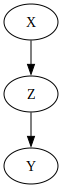

In [26]:
f = graphviz.Digraph()
f.edge("X", "Z")
f.edge("Z", "Y")
f

2. **Biforcazioni (X ← Z → Y)**: Le biforcazioni vengono rappresentate dalla struttura X $\leftarrow$ Z $\rightarrow$ Y, in cui una variabile comune Z è la causa di entrambe le variabili X e Y. Questo tipo di struttura non implica una connessione causale diretta tra X e Y, ma suggerisce piuttosto che entrambe sono influenzate da una causa comune, cioè Z. Le biforcazioni sono di fondamentale importanza per comprendere il concetto di *confondimento*, che si verifica quando la relazione apparente tra X e Y può essere spiegata dalla presenza di una variabile condivisa, Z.

Per fare un esempio concreto, consideriamo le variabili del livello di istruzione (X) e del reddito (Y). Supponiamo di notare una correlazione tra queste due variabili. Tuttavia, questa correlazione non implica necessariamente l'esistenza di una relazione di causa ed effetto diretta tra il livello di istruzione e il reddito. La correlazione tra X e Y potrebbe invece essere il risultato dell'influenza di una terza variabile, come ad esempio l'intelligenza (Z), che agisce come causa comune che influisce sia su X che su Y.

In altre parole, l'istruzione e il reddito sembrano correlati non perché uno di essi influisce direttamente sull'altro, ma perché entrambi sono influenzati dall'intelligenza. Quando si analizzano i dati tenendo conto dell'intelligenza e si esegue una suddivisione dei dati basata su gruppi omogenei di intelligenza, l'apparente associazione tra istruzione e reddito potrebbe scomparire. Questo suggerisce che la correlazione precedentemente osservata tra istruzione e reddito non è causata da un effetto diretto tra queste due variabili, ma è piuttosto il risultato dell'effetto di una causa comune, ossia l'intelligenza.

La stratificazione dei dati in base all'intelligenza consente quindi di isolare e comprendere meglio le relazioni causali, dimostrando che ciò che sembra essere una connessione diretta tra due variabili potrebbe in realtà derivare dall'effetto di una causa comune.

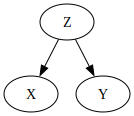

In [25]:
f = graphviz.Digraph()
f.edge("Z", "X")
f.edge("Z", "Y")
f

3. **Biforcazioni Invertite (X → Z ← Y)**: Le biforcazioni invertite, anche note come collider, sono caratterizzate dalla struttura X $\rightarrow$ Z $\leftarrow$ Y. Qui, X e Y sono due variabili indipendenti, il che significa che non hanno una connessione causale diretta o un'influenza reciproca. Tuttavia, entrambe influenzano una terza variabile, Z.

Un modo semplice per visualizzare questo è immaginare due fiumi (X e Y) che confluiscono in un unico lago (Z). I fiumi apportano acqua al lago, ma il flusso di un fiume non influenza direttamente l'altro.

Un aspetto cruciale di questa struttura è che, nonostante X e Y influenzino Z, non esiste necessariamente una relazione diretta tra X e Y stesse. Ciò significa che non possiamo assumere che ci sia una correlazione o una relazione causale tra X e Y solo perché entrambe influenzano Z. Tuttavia, se iniziamo a esaminare solo i casi in cui Z presenta determinate caratteristiche (ad esempio, un alto livello nel lago), potremmo erroneamente iniziare a vedere un'associazione tra X e Y. Questo è noto come bias del collider.

Per esemplificare, prendiamo il caso del talento musicale (X), il supporto familiare (Y) e il successo in una carriera musicale (Z). Il talento e il supporto familiare possono entrambi contribuire al successo musicale, ma non implica che ci sia una relazione diretta tra il talento musicale di una persona e il livello di supporto familiare che riceve. Se però ci focalizziamo solo sulle persone di successo (Z), potremmo iniziare a vedere un'associazione tra talento e supporto familiare, anche se questa associazione potrebbe non esistere nella popolazione generale.

Comprendere le Biforcazioni Invertite è fondamentale per evitare errori nell'interpretazione dei dati e nelle conclusioni causali, soprattutto quando si lavora con variabili che potrebbero agire come collider. 

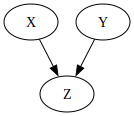

In [27]:
f = graphviz.Digraph()
f.edge("X", "Z")
f.edge("Y", "Z")
f

La comprensione di queste strutture causali di base è fondamentale per analizzare i percorsi causali più complessi. Esistono principalmente tre tipi di strutture causali di base che determinano le caratteristiche dei percorsi più estesi:

1. **Percorsi di Tipo Catena**. Questi percorsi sono formati da una serie di collegamenti causali diretti. Un percorso composto esclusivamente da catene può trasmettere un'associazione causale. Ad esempio, consideriamo il percorso: intelligenza → voti → titolo di studio → reddito. In questo caso, c'è una trasmissione diretta dell'associazione causale lungo la catena. Ogni variabile lungo il percorso può essere vista come un "discendente" delle variabili precedenti e un "antenato" delle variabili successive. In altre parole, la variabile "intelligenza" influenzerebbe i "voti", che a loro volta influenzano il "titolo di studio", il quale infine influenzerebbe il "reddito". Questi percorsi mostrano come un effetto può essere trasmesso attraverso una serie di variabili intermedie.

2. **Percorsi con Biforcazioni**. Un percorso che contiene anche delle biforcazioni trasmette un'associazione, ma non rappresenta più una relazione causale a causa dell'introduzione di una variabile di confondimento. Per esempio, consideriamo il percorso: titolo di studio ← voti ← intelligenza → reddito. Qui, "intelligenza" è una variabile comune che influenza sia "voti" che "reddito". In questa struttura, "intelligenza" agisce come una variabile di confondimento, rendendo la relazione tra "voti" e "reddito" meno diretta. Questo perché l'effetto di "voti" su "reddito" potrebbe essere spiegato o influenzato da "intelligenza".

3. **Percorsi con Biforcazioni Invertite**. Un percorso che presenta una biforcazione invertita è bloccato e non trasmette alcuna associazione. Questi percorsi includono una struttura dove due variabili indipendenti influenzano una terza. Ad esempio, nel percorso titolo di studio → reddito ← intelligenza → voti, abbiamo una biforcazione invertita al "reddito". In questo caso, nonostante "titolo di studio" e "voti" influenzino entrambi il "reddito", non c'è necessariamente una relazione diretta o una correlazione tra "titolo di studio" e "voti". Questi percorsi sono "bloccati" in termini di trasmissione associativa tra le variabili agli estremi della biforcazione invertita.

In breve, le tre strutture causali di base determinano le caratteristiche dei percorsi più lunghi. Un percorso costituito esclusivamente da catene può trasmettere un'associazione causale. I percorsi che includono biforcazioni sono in grado di trasmettere un'associazione, ma questa non è causale in quanto è influenzata dalla presenza di variabili confondenti. Infine, i percorsi che contengono biforcazioni invertite sono interrotti e non trasmettono alcuna associazione.

## Irreversibilità e Aciclicità nei DAG

Nei DAG i percorsi ciclici non sono ammessi. Ciò implica che una variabile non può diventare sua stessa antenata, eliminando così la possibilità di un'influenza causale su se stessa. Questa caratteristica garantisce la coerenza e la validità delle analisi causali basate su tali diagrammi. Ad esempio, nel DAG precedente, non si può invertire il percorso da intelligenza a reddito, poiché ciò creerebbe un percorso ciclico (intelligenza → istruzione → reddito → intelligenza).

Questa restrizione può sembrare controintuitiva, specialmente in psicologia dove spesso esistono cicli di feedback. Ad esempio, l'intelligenza può influenzare l'istruzione, ma anche l'istruzione può influenzare l'intelligenza. Tuttavia, tali cicli di feedback possono essere modellati in un DAG considerando l'ordine temporale e aggiungendo nodi per misurazioni ripetute.

Per esempio, un DAG potrebbe rappresentare come l'intelligenza nell'infanzia influenzi l'istruzione, che a sua volta influenza l'intelligenza in età adulta. La risoluzione temporale in un DAG può essere ulteriormente "ingrandita", con valutazioni annuali, mensili o addirittura giornaliere di molteplici variabili, portando all'aggiunta di sempre più nodi nel DAG. Questo permette di modellare la dinamica temporale e i cambiamenti nelle relazioni causali nel tempo, pur mantenendo la struttura aciclica del grafico.

In sintesi, anche se i DAG sono aciclici e non permettono cicli diretti, possono comunque rappresentare sistemi dinamici e complessi con relazioni causali che cambiano nel tempo, attraverso una rappresentazione più dettagliata e stratificata del tempo e delle variabili.

## Il Confondimento nei Dati Osservazionali

La principale sfida nei dati osservazionali riguarda il confondimento. Questo fenomeno si manifesta quando c'è una causa comune o più cause che influenzano sia la variabile indipendente, che rappresenta la potenziale causa di interesse, sia la variabile dipendente, che rappresenta il risultato di interesse. L'influenza concomitante di queste variabili può dar luogo a ciò che spesso viene definito una correlazione spuria, la quale non deve essere confusa con un effetto causale.

Esaminiamo ora una simulazione che chiarisce il concetto di correlazione spuria. Denotiamo con `c` una variabile di confondimento.

In [21]:
c = np.random.rand(100)

Nella simulazione, le variabili `x` e `y` sono indipendenti tra di loro dal punto di vista causale, ma entrambe sono influenzate dalla variabile `c`. Come abbiamo visto in precedenza, questa struttura casuale corrisponde ad una "biforcazione" nel DAG.

In [22]:
x = c + 0.1 * np.random.rand(100)
y = c + 0.3 * np.random.rand(100)

Esaminiamo ora la correlazione tra `a` e `c`.

In [23]:
coef, p_val = stats.pearsonr(x, y)
print(coef)

0.9427215659187514


In altre parole, anche se le variabili `x` e `y`  sono causalmente indipendenti, la presenza di una terza variabile `c` (variabile di confondimento) che le influenza entrambe fa sì che `x` e `y` risultino correlate tra di loro. Questo è un esempio di correlazione spuria.

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_34992/259294172.py:22: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.3)


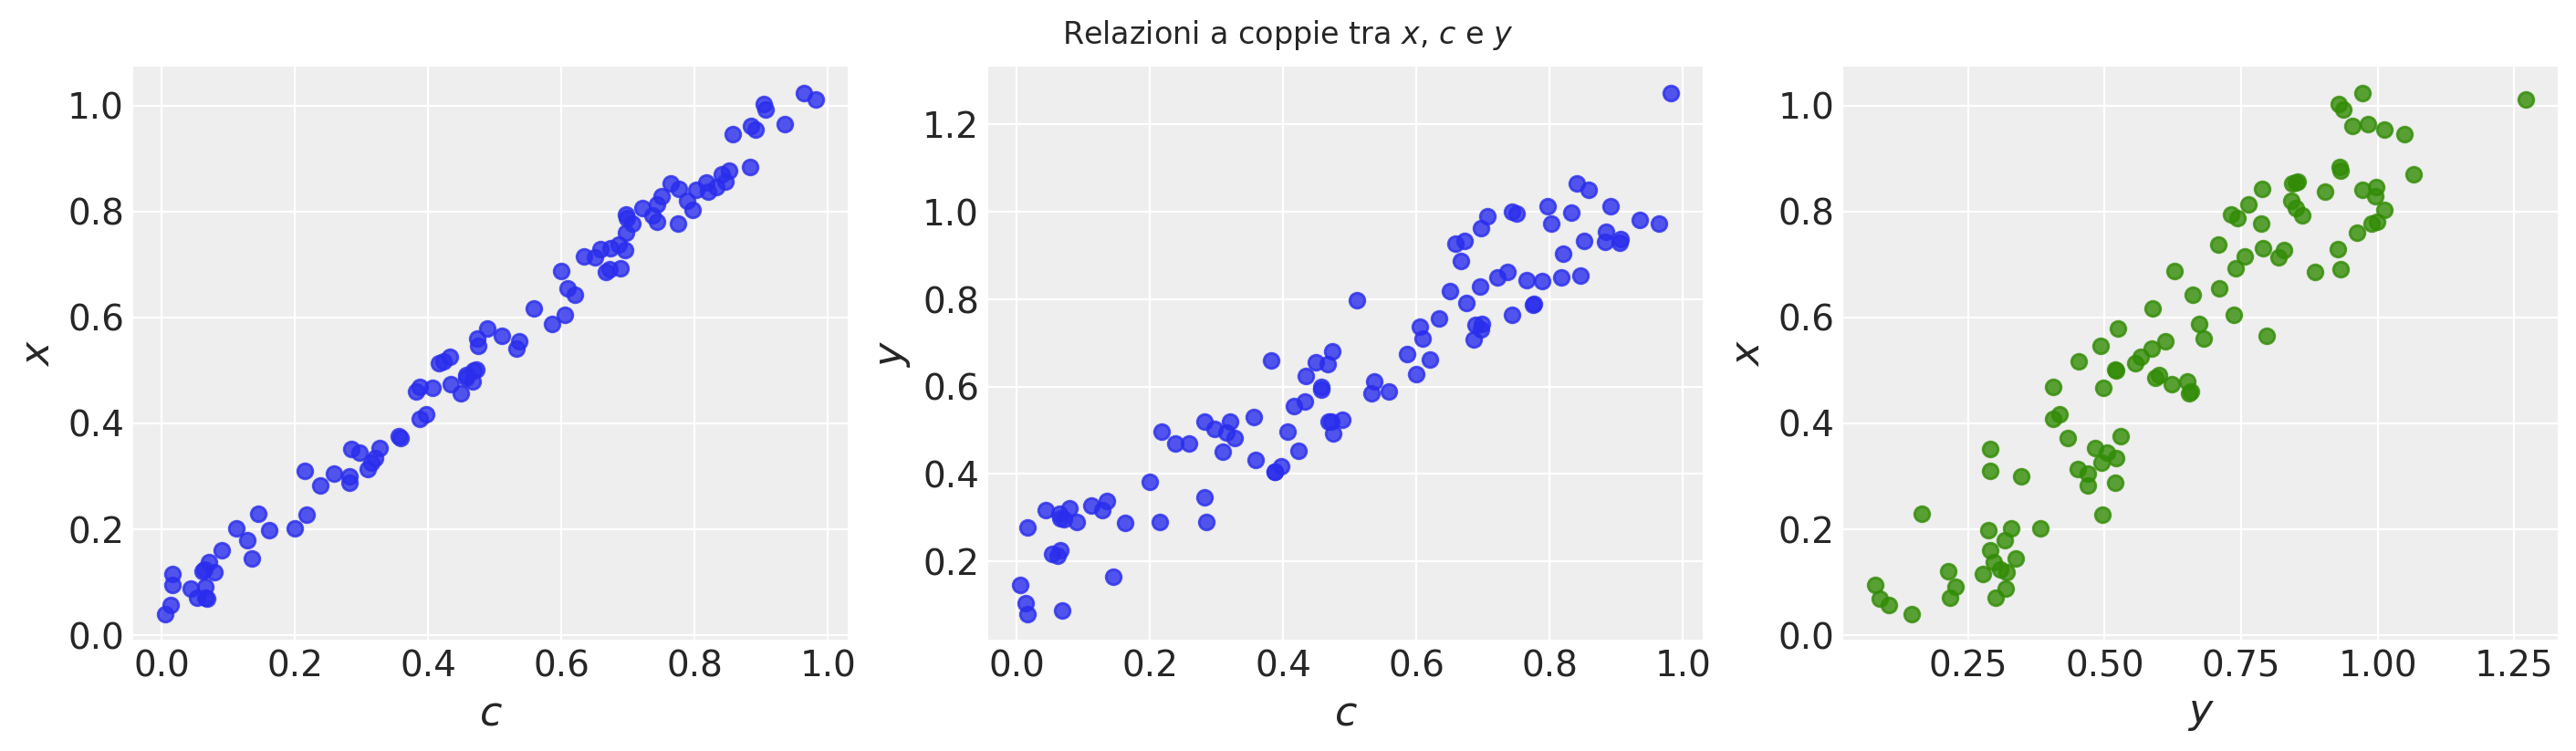

In [24]:
# Il codice è tratto da A. Molak (2023) "Causal Inference and Discovery in Python".

COLORS = ["C0", "C2"]

variables = {"x": x, "c": c, "y": y}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, (var_1, var_2) in enumerate([("c", "x"), ("c", "y"), ("y", "x")]):
    color = COLORS[1]

    if "c" in [var_1, var_2]:
        color = COLORS[0]

    ax = axes[i]
    ax.scatter(variables[var_1], variables[var_2], alpha=0.8, color=color)

    ax.set_xlabel(f"${var_1}$", fontsize=16)
    ax.set_ylabel(f"${var_2}$", fontsize=16)

plt.suptitle("Relazioni a coppie tra $x$, $c$ e $y$")
plt.subplots_adjust(wspace=0.3)
plt.show()

In conclusione, quando osserviamo l'associazione tra due variabili, $X$ e $Y$, una tale associazione potrebbe non essere una conseguenza della diretta relazione causale tra $X$ e $Y$, ma piuttosto un effetto di una terza variabile, in questo caso $C$, che è una "causa comune" per entrambe.

## Uso dei DAG per Identificare il Confondimento

Le Directed Acyclic Graphs (DAG) possono essere utilizzati per identificare il confondimento, ossia per eliminare le associazioni spurie e assicurare l'isolamento dell'effetto causale genuino. Tuttavia, il vincolo per ottenere questo risultato è difficilmente soddisfacibile in situazioni reali, poiché richiede che il DAG contenga tutte le informazioni rilevanti relative all'effetto causale di interesse. Di conseguenza, nella pratica, i DAG non vengono impiegati principalmente per garantire l'isolamento dell'effetto causale privo di confondimenti, ma piuttosto come uno strumento per formulare e testare ipotesi sulla causalità.

Ad esempio, è possibile estendere il DAG mostrato nella figura precedente aggiungendo variabili supplementari che possono influenzare il livello di istruzione o altre variabili. Tuttavia, non tutte queste estensioni potrebbero risultare rilevanti se l'obiettivo è esaminare la relazione causale tra il livello di istruzione e il reddito. Per illustrare, una variabile che ha un impatto sul livello di istruzione ma non ha un effetto causale su altre variabili nel DAG non dovrebbe essere inclusa.

Per costruire un DAG causale completo che conduca a conclusioni causali valide, è fondamentale incorporare tutte le cause comuni di ciascuna coppia di variabili già presenti nel DAG. Ciò comporta l'inclusione di qualsiasi variabile che influenzi direttamente o indirettamente almeno due variabili nel DAG.

### Identificazione e Blocco dei Percorsi Retrostanti

In un DAG, i percorsi retrostanti, comunemente noti come "back-door", rappresentano connessioni tra variabili che possono introdurre distorsioni nelle analisi causali. Un percorso retrostante ha origine da una variabile che influenza un'altra variabile (la variabile indipendente) e prosegue fino a collegarsi alla variabile di interesse (la variabile dipendente). Tali percorsi possono suggerire un'associazione tra variabili che non è effettivamente causale, ma piuttosto è il risultato di un fattore comune che influisce su entrambe le variabili.

Per chiarire questo concetto, consideriamo un DAG che descrive la relazione tra il livello di istruzione e il reddito. In questo DAG, emergono due percorsi retrostanti:

1. Livello di Istruzione ← Voti Scolastici ← Intelligenza → Reddito.
2. Livello di Istruzione ← Intelligenza → Reddito.

In entrambi questi casi, la variabile "Intelligenza" svolge il ruolo di intermediario tra il livello di istruzione e il reddito. Ciò implica che qualsiasi associazione osservata tra il livello di istruzione e il reddito potrebbe non essere completamente spiegata da una relazione causale diretta, ma potrebbe essere influenzata dalla presenza di un terzo fattore, ovvero l'intelligenza.

Questi percorsi sono considerati "aperti" poiché non contengono strutture che blocchino la correlazione spuria (ad esempio, biforcazioni invertite, che sono configurazioni che impediscono la trasmissione di associazioni non causali). La presenza di tali percorsi aperti può portare a interpretazioni errate della relazione tra il livello di istruzione e il reddito.

Per evitare conclusioni inaccurate, è fondamentale "bloccare" questi percorsi. Bloccare un percorso significa controllare o adeguare le variabili in modo da eliminare l'influenza delle associazioni non causali. Nel nostro esempio, ciò può essere ottenuto controllando la variabile "Intelligenza" nelle analisi, garantendo così che le associazioni osservate tra il livello di istruzione e il reddito non siano influenzate in modo improprio da questa variabile comune.

### Controllo Statistico per Bloccare i Percorsi Retrostanti

#### Obiettivo del Controllo di Terze Variabili

La procedura di controllo delle variabili terze ha l'obiettivo di interrompere i percorsi retrostanti aperti tra le variabili coinvolte. Se è possibile bloccare tutti i percorsi retrostanti tra le variabili indipendenti e quelle dipendenti, è quindi possibile identificare l'effetto causale che connette queste variabili, anche quando i dati sono di natura puramente osservazionale. Questo principio segue il criterio del "back-door" proposto da Pearl nel 1993. L'identificazione di un tale effetto causale è valida, a condizione che il DAG rifletta accuratamente la rete causale sottostante.

Tuttavia, l'assunzione di aver catturato correttamente la rete causale e di aver bloccato con successo tutti i percorsi retrostanti spesso si rivela molto impegnativa, poiché implica che non siano state trascurate variabili rilevanti all'interno del grafo causale. La plausibilità di questa assunzione deve essere valutata attentamente caso per caso, poiché può variare a seconda del contesto e della complessità della rete causale in esame.

#### Come Bloccare un Percorso Retrostante

Un percorso retrostante può essere interrotto mediante il 'taglio' della trasmissione dell'associazione in qualsiasi punto del percorso, attraverso il controllo statistico di un nodo. Per esempio, considerando il percorso non causale 'istruzione ← voti ← intelligenza → reddito', potremmo effettuare un controllo statistico sui 'voti'. Questa azione bloccherebbe efficacemente questo percorso retrostante, impedendo la trasmissione di un'associazione non causale. Tuttavia, potremmo anche eseguire un controllo statistico su 'intelligenza', il che interromperebbe sia questo percorso che il secondo percorso retrostante, 'istruzione ← intelligenza → reddito'.

Se il DAG nella figura riflette accuratamente la rete causale sottostante, controllare la variabile 'intelligenza' sarebbe sufficiente per identificare l'effetto causale dell'istruzione sul reddito poiché bloccherebbe tutti i percorsi retrostanti. Tuttavia, è fondamentale che il DAG sia una rappresentazione fedele della realtà, poiché il successo del controllo dipende dalla sua corretta rappresentazione della struttura causale delle variabili coinvolte.

#### Pratiche per il Controllo delle Variabili in un DAG

Esistono diverse metodologie per controllare le variabili all'interno di un DAG e conseguentemente interrompere i percorsi retrostanti. Queste procedure possono sembrare differenti tra loro, richiedendo diverse tecniche statistiche, ma condividono l'obiettivo comune di bloccare i percorsi retrostanti. In ogni caso, è essenziale che, se si desidera controllare una specifica variabile, questa debba essere misurata e inclusa nelle analisi, poiché il controllo richiede dati affidabili sulla variabile in questione.

#### Considerazioni sulla Stima dell'Effetto

Anche se il DAG rappresenta accuratamente il modello causale sottostante, se i percorsi retrostanti da bloccare sono identificati correttamente e se tutte le variabili necessarie per bloccare tali percorsi sono misurate, è ancora possibile commettere errori durante l'effettiva stima dell'effetto di interesse. L'identificazione causale qualitativa e la successiva stima quantitativa (di solito parametrica) dell'effetto identificato sono due problemi distinti: è possibile controllare le variabili corrette, ma farlo in modo impreciso.

### Come Controllare una Variabile nei Dati Osservazionali

#### Analisi Stratificata

In alcuni scenari, è possibile suddividere il campione al fine di controllare i confondenti. Ad esempio, prendiamo in considerazione il controllo per una variabile categorica come il sesso biologico. È possibile suddividere il campione in gruppi omogenei in base al sesso, condurre analisi all'interno di ciascun gruppo e quindi combinare le stime ottenute da queste analisi in una stima complessiva. Questo approccio assicura che gli effetti legati al sesso non offrano una spiegazione alternativa ai risultati osservati. L'analisi stratificata può essere una scelta interessante per la sua chiarezza, ma può diventare impraticabile quando la variabile di controllo ha numerosi livelli, è continua o quando è necessario considerare contemporaneamente diverse variabili di controllo e le loro interazioni.

#### Includere Variabili Terze nei Modelli di Regressione

Un approccio comune in psicologia e nelle scienze sociali è l'utilizzo di modelli di regressione multipla per ottenere un controllo statistico. Questi modelli regrediscono la variabile dipendente sia sulla variabile indipendente principale sia sulle covariate al fine di 'controllare' gli effetti delle covariate e, potenzialmente, bloccare i percorsi retrostanti.

Tuttavia, nei casi standard, spesso i psicologi utilizzano modelli che assumono relazioni lineari senza fornire una giustificazione esplicita. Questo approccio non garantisce necessariamente un adeguato controllo delle covariate. Per esempio, se gli effetti delle covariate sulle variabili dipendenti e indipendenti seguono una tendenza quadratica, il semplice controllo lineare potrebbe non eliminare completamente l'influenza della covariata. In questo caso, sarebbe necessario includere sia la covariata sia la covariata elevata al quadrato nel modello per gestire correttamente la loro influenza. 

Inoltre, se le covariate hanno effetti interattivi con la variabile indipendente principale, è essenziale considerare queste interazioni nel modello per ottenere stime accurate degli effetti.

### Il Matching come Metodo di Controllo Statistico

#### Uso del Matching per Controllare Variabili Multiple

In molte situazioni, può sorgere la necessità di controllare non solo una singola variabile terza, ma molteplici variabili terze contemporaneamente. Inoltre, potrebbe essere desiderabile controllare queste variabili terze in modo completamente non parametrico, ovvero senza fare assunzioni specifiche riguardo alle forme funzionali dei loro effetti. Il matching è un approccio utilizzato per affrontare queste complesse situazioni. Esistono vari metodi di matching, ma il matching basato sul punteggio di propensione (propensity score matching) gode di grande popolarità nelle scienze sociali. 

```{note}
Il processo di propensity score matching inizia con il calcolo del propensity score, che rappresenta la probabilità che un individuo sia stato assegnato al gruppo di trattamento, basandosi sulle sue caratteristiche di base. Questo valore può essere ottenuto mediante tecniche di regressione logistica o altri approcci statistici simili.

Successivamente, si procede con la creazione di un gruppo di controllo attraverso il matching dei propensity scores. Si cercano individui nel gruppo di controllo che abbiano propensity scores simili a quelli nel gruppo di trattamento. In altre parole, si accoppiano individui con probabilità simili di essere assegnati al gruppo di trattamento, basandosi sulle loro caratteristiche di base.

Questo processo di matching crea un gruppo di controllo "equivalente" al gruppo di trattamento in termini di caratteristiche di base, riducendo al minimo il confondimento. Una volta completato il matching, è possibile condurre un'analisi comparativa tra i due gruppi, tenendo conto delle caratteristiche di base ora bilanciate grazie al propensity score matching. Questo consente di stimare in modo più accurato l'effetto causale del trattamento o dell'intervento di interesse.

Un esempio concreto di propensity score matching è la ricerca di Jackson et al. (2012) per studiare gli effetti dell'addestramento militare rispetto al servizio civile sulla personalità. Utilizzando le covariate come l'età, il livello di istruzione e il background socio-economico, è stato calcolato il propensity score di ciascun individuo, ovvero la probabilità di scegliere l'addestramento militare piuttosto che il servizio civile. Successivamente, sono stati creati gruppi appaiati di individui che avevano scelto il servizio militare e individui che avevano scelto il servizio civile che avevano propensity scores simili. Questo processo ha garantito che i due gruppi fossero comparabili rispetto alle variabili di controllo, consentendo una stima più accurata degli effetti dell'addestramento militare sulla personalità, mentre bloccava potenziali percorsi retrostanti confondenti.
```

#### Considerazioni sul Matching

Il matching serve allo stesso scopo dell'approccio più comune di inclusione di variabili di controllo. Sebbene i punteggi di propensione possano, a seconda delle circostanze, offrire certi vantaggi nella stima di un effetto, non modificano la logica sottostante l'identificazione causale. In altre parole, se si omette una variabile di confondimento significativa o se vengono incluse variabili che non dovrebbero essere considerate, i punteggi di propensione, come altri metodi di controllo statistico, possono fallire nel riconoscere correttamente l'effetto causale.

Inoltre, è importante considerare se il modello utilizzato per calcolare i punteggi di propensione cattura accuratamente le relazioni tra le caratteristiche di background e la propensione ad unirsi all'esercito, poiché la validità dei punteggi di propensione dipende dalla corretta specificazione di questo modello.

### Errore di Misurazione nelle Variabili di Confondimento e il suo Impatto

#### Influenza dell'Errore di Misurazione

L'errore di misurazione può influenzare tutti i metodi di controllo statistico. Ad esempio, considerando l'intelligenza come variabile di confondimento nelle due figure precedenti, è importante notare che questa non può essere misurata in modo perfettamente accurato. Di conseguenza, l'aggiustamento statistico per l'intelligenza potrebbe non essere in grado di eliminare completamente la sua influenza confondente. Questo potrebbe portare a una sovrastima erronea dell'effetto dell'istruzione sul reddito a causa della persistenza di un confondimento residuo. Va notato che questo problema si applica anche al matching basato sui punteggi di propensione se i punteggi stessi sono influenzati da errori di misurazione nelle variabili utilizzate per calcolarli.

### Il Dilemma del Controllo Statistico Eccessivo

#### Pratica Comune e i suoi Limiti

In alcuni campi di ricerca, è diventata una pratica comune includere quante più covariate possibili, tanto che alcuni autori affermano di avere maggiore fiducia nei loro risultati perché il loro studio "utilizza più variabili di controllo rispetto a studi precedenti" (Tiefenbach & Kohlbacher, 2015, p. 85). Mentre è vero che non controllare per confondenti importanti può minare le conclusioni di uno studio, non è corretto affermare che semplicemente aggiungere più covariate migliorerà sempre la stima di un effetto causale.

La semplice inclusione di un gran numero di covariate può comportare problemi, come il sovraccarico del modello e la possibilità di errore di misurazione o di introduzione di confondenti spuri. Pertanto, la selezione o l'inclusione delle covariate dovrebbe essere basata su una comprensione teorica solida e su evidenze empiriche, piuttosto che su un approccio di "più è meglio".

#### Tipi di Variabili da Non Controllare

È importante distinguere tra due tipi di variabili che dovrebbero essere trattate con cautela quando si controlla il confondimento: i "collider" e i "mediatori". A differenza dei confondenti, che influenzano causalmente la variabile indipendente di interesse, i "collider" e i "mediatori" sono influenzati causalmente dalla variabile indipendente stessa. Questi sono spesso chiamati "variabili post-trattamento" poiché rappresentano fenomeni che si verificano dopo l'applicazione del trattamento o dell'intervento.

Una regola fondamentale che i ricercatori dovrebbero seguire è quella di evitare di controllare o aggiungere tali variabili post-trattamento come covariate nei modelli di analisi (Rosenbaum, 1984; Rubin, 1974). L'inclusione di collider o mediatori come covariate può portare a risultati distorti e interpretazioni errate. Pertanto, è cruciale essere consapevoli di queste distinzioni e delle implicazioni causali quando si progetta e si analizza uno studio di ricerca.

#### Analisi dei Rischi nel Controllo di Collider e Mediatori

La gestione delle variabili "collider" e dei mediatori nelle analisi statistiche richiede una particolare attenzione, poiché il loro controllo inappropriato può introdurre distorsioni invece di eliminare le associazioni spurie. Per comprendere meglio questa situazione, è importante distinguere tra collider e mediatori.

Un "collider" è una variabile influenzata da due o più variabili nel modello. Quando si controlla per un collider, cioè lo si include come covariata nell'analisi, si possono creare nuovi percorsi "back-door" e generare associazioni artificiose tra le variabili causali, portando a risultati fuorvianti.

D'altra parte, i "mediatori" sono variabili che costituiscono un collegamento nel percorso causale tra la variabile indipendente e quella dipendente. Il controllo dei mediatori può portare all'esclusione di parte dell'effetto causale che si sta cercando di misurare, dato che rappresentano un elemento chiave nel meccanismo di causalità.

Per esemplificare, esaminiamo un esempio relativo a intelligenza e creatività in relazione al concetto di collider. Supponiamo di analizzare la relazione tra intelligenza ($X$) e creatività ($Y$) in un gruppo di studenti. Poniamo che non vi sia una relazione diretta tra queste due variabili nella popolazione generale degli studenti. 

In [2]:
np.random.seed(123) # Per la riproducibilità dell'esempio

# Numero di studenti
n = 1000

# Generazione di dati simulati
intelligenza = np.random.normal(100, 15, n) # Intelligenza: distribuzione normale
creativita = np.random.normal(100, 15, n)  # Creatività: distribuzione normale

# Non c'è correlazione reale tra intelligenza e creatività
correlazione_generale = np.corrcoef(intelligenza, creativita)[0, 1]
print(f"Correlazione nella popolazione generale: {correlazione_generale}")

Correlazione nella popolazione generale: -0.03128347374134393


Tuttavia, immaginiamo che un prestigioso programma artistico selezioni gli studenti ($Z$) basandosi su una combinazione di intelligenza e creatività. Ora, introduciamo un terzo elemento: la selezione degli studenti da parte di un prestigioso programma artistico che si basa su una combinazione di intelligenza e creatività (Z). Quindi abbiamo tre variabili.

- Intelligenza (X): Una misura delle capacità cognitive degli studenti.
- Creatività (Y): Una misura delle capacità creative degli studenti.
- Selezione nel programma artistico (Z): Questo è il collider. 

Nello studio, il programma artistico seleziona studenti che hanno sia un alto livello di intelligenza che un alto livello di creatività. Ciò significa che gli studenti con alti livelli in entrambe le variabili (X e Y) hanno maggiori probabilità di essere inclusi nel programma (Z).

Se ora analizziamo solo gli studenti all'interno di questo programma artistico, potremmo erroneamente concludere che esiste una relazione negativa tra intelligenza e creatività. Questo perché, all'interno di questo gruppo selezionato (Z), gli studenti con intelligenza molto alta potrebbero non essere necessariamente i più creativi, e viceversa, a causa della selezione combinata di entrambe le caratteristiche.

In altre parole, la selezione nel programma (Z) agisce come un collider. Se includiamo questa variabile nel nostro modello statistico (cioè, la controlliamo nell'analisi), potremmo erroneamente identificare una relazione negativa tra intelligenza e creatività che non esiste nella popolazione generale degli studenti. Questa relazione osservata è un artefatto della selezione nel programma, non una vera relazione causale tra intelligenza e creatività.

In [4]:
# Creazione di un collider
selezione_programma = (intelligenza + creativita) > 180 # Collider

# Creazione di un DataFrame
data = pd.DataFrame({
    'Intelligenza': intelligenza,
    'Creatività': creativita,
    'SelezioneProgramma': selezione_programma
})

data.head()

,Intelligenza,Creatività,SelezioneProgramma
0,83.715541,88.767588,False
1,114.960182,108.513921,True
2,104.244677,110.772258,True
3,77.405579,85.009289,False
4,91.320996,107.123475,True


In [5]:
# Calcolo della correlazione nella popolazione generale
cor_gen = data['Intelligenza'].corr(data['Creatività'])
print(f"Correlazione nella popolazione generale: {cor_gen}")

# Calcolo della correlazione nel gruppo selezionato dal programma (collider)
data_selezionati = data[data['SelezioneProgramma']]
cor_selezionati = data_selezionati['Intelligenza'].corr(data_selezionati['Creatività'])
print(f"Correlazione nel gruppo selezionato: {cor_selezionati}")


Correlazione nella popolazione generale: -0.03128347374134393
Correlazione nel gruppo selezionato: -0.2557322309536501


La chiave qui è che controllare o condizionare l'analisi su un collider (in questo caso, la selezione nel programma) può introdurre un bias, creando associazioni o correlazioni che non sono reali. Questo è un esempio classico di come il controllo di un collider in un'analisi statistica possa portare a conclusioni errate.

### Il Bias del Collider nelle Procedure di Campionamento

Il bias del collider può emergere non solo dall'uso inappropriato di covariate, ma anche da specifiche procedure di campionamento, un fenomeno noto come bias di selezione endogena. Elwert e Winship (2014) hanno esaminato diverse modalità in cui questo bias si manifesta, con particolare attenzione ai contesti rilevanti in psicologia.

#### Bias di Non Risposta
Questo tipo di bias si verifica quando le variabili di interesse influenzano la probabilità di completamento di un'azione, come il completamento di un questionario. Ad esempio, in uno studio sulla relazione tra grinta e intelligenza, potremmo trovare che sia la grinta che l'intelligenza influenzano la probabilità di completare un questionario impegnativo. Se analizziamo solo i questionari completati, introduciamo un collider: il completamento del questionario stesso. Questo può portare a rilevare erroneamente un'associazione negativa tra grinta e intelligenza, dato che individui con alta grinta ma bassa intelligenza, o viceversa, potrebbero essere sovrarappresentati tra quelli che completano il questionario.

#### Bias di Attrito
Questo bias si manifesta in studi longitudinali quando si analizzano solo i dati dei partecipanti che non hanno abbandonato lo studio. Ad esempio, in uno studio sugli effetti dei problemi di salute sulla soddisfazione lavorativa, l'abbandono dello studio potrebbe essere influenzato sia dalla salute che dalle condizioni di lavoro. Se le persone con problemi di salute tendono a rimanere nello studio se hanno un lavoro meno stressante, mentre quelle in ambienti di lavoro stressanti rimangono se godono di buona salute, ciò crea un legame artificiale tra salute e ambiente di lavoro stressante nel campione residuo. L'analisi di questo gruppo selezionato potrebbe portare a sottostimare l'effetto dei problemi di salute sulla soddisfazione lavorativa.

### Problemi Correlati: Dati Mancanti e Rappresentatività nei Dati Osservazionali

#### Bias di Selezione Endogena e Dati Mancanti
Il bias di selezione endogena è strettamente legato ai problemi di dati mancanti. Il bias di non risposta e di attrito, che portano a dati mancanti, devono essere considerati attentamente per trarre conclusioni causali valide da dati osservazionali. 

#### Problema della Non Rappresentatività dei Campioni
La non rappresentatività dei campioni è un altro problema legato al bias di selezione endogena. Se, ad esempio, uno studio si concentra solo su studenti universitari, ciò introduce un bias di selezione tra tutte le variabili che influenzano la probabilità di diventare uno studente universitario, come lo status socio-economico e le capacità cognitive.

### Il Bias da Sovracontrollo: La Rimozione dei Processi di Interesse

#### Sovracontrollo e Bias

Se l'analisi dei collider può portare alla comparsa di associazioni spurie, è altrettanto importante riconoscere che il controllo dei mediatori può contribuire all'annullamento di associazioni che sono effettivamente presenti. Si può dire che si verifica un "bias da sovracontrollo" quando il controllo statistico delle variabili mediatrici elimina i processi di interesse che collegano le variabili tra loro.

Per chiarire questo concetto, prendiamo in considerazione uno scenario in cui vogliamo indagare sull'effetto dell'istruzione sull'intelligenza in età adulta. In questo contesto, l'istruzione può influenzare diversi aspetti dello sviluppo intellettuale di un individuo, sia in modo diretto che attraverso variabili mediatrici, quali l'accesso a risorse educative, il contesto socio-economico o la motivazione personale.

Se nel nostro modello statistico applichiamo un eccessivo controllo su tutte queste variabili mediatrici, potremmo erroneamente concludere che l'istruzione non ha un impatto significativo sull'intelligenza in età adulta. Questo accade perché, attraverso il controllo delle variabili mediatrici, rimuoviamo i percorsi attraverso cui l'istruzione effettivamente influenza l'intelligenza. Di conseguenza, l'effetto diretto dell'istruzione potrebbe apparire attenuato o persino assente.

### La Complessità delle Inferenze Causali sui Dati Correlazionali

La sfida di trarre inferenze causali da dati osservazionali è notevolmente complicata dalla necessità di identificare e controllare adeguatamente i fattori confondenti. Questo processo richiede un'attenta considerazione dei potenziali problemi, come il confondimento non lineare e gli errori di misurazione. Prima di raccogliere i dati, è fondamentale valutare le possibili variabili influenti per garantire che tutte le variabili rilevanti siano misurate. In questo contesto, è anche cruciale considerare quali variabili non dovrebbero essere controllate, ad esempio i collider e i mediatori.

La fase di pianificazione della raccolta dati assume un ruolo critico. I ricercatori devono anticipare come il processo di reclutamento del campione possa introdurre un bias di selezione endogena, compromettendo così la validità delle conclusioni. Frequentemente, i ricercatori si trovano di fronte a dati privi di misure affidabili dei confondenti chiave, a causa di variabili non considerate in precedenza o perché i dati sono stati raccolti da fonti terze. In questi casi, un'analisi dettagliata della rete causale sottostante può portare alla conclusione che i dati disponibili non sono sufficienti per supportare affermazioni causali. È importante riconoscere che, soprattutto nel campo della psicologia, i grafici causali tendono a essere significativamente più complessi di quanto si possa illustrare in esempi teorici.

In generale, le conclusioni causali più solide sono quelle supportate da "evidenze convergenti", derivanti da diverse metodologie di ricerca. Se da un lato gli esperimenti randomizzati ben progettati forniscono un elevato livello di fiducia nella validità interna, ovvero nella presenza di una relazione causa-effetto nell'ambito dello studio, dall'altro richiedono assunzioni aggiuntive per dimostrare la rilevanza o l'applicabilità di tale relazione in contesti più ampi o nella vita quotidiana. Questo aspetto solleva questioni sulla loro validità esterna, cioè sulla generalizzabilità dei risultati al di fuori delle condizioni sperimentali specifiche. L'impiego di un insieme diversificato di design di ricerca, che includa sia studi sperimentali rigorosi sia dati osservazionali, può fornire contributi unici per rispondere a domande di ricerca comuni. Ciò migliora la validità esterna delle scoperte e suggerisce nuovi fenomeni meritevoli di ulteriori indagini.

## Riconsiderazione delle Inferenze Causali in Studi Osservazionali

L'analisi delle inferenze causali in studi basati su dati osservazionali necessita di una comprensione approfondita di diverse componenti fondamentali, che includono il riconoscimento dei confondenti, l'analisi dei percorsi causali, la gestione dei mediatori e dei collider, e la valutazione della validità interna ed esterna degli studi. 

1. **Riconoscimento dei Confondenti**: La chiave per interpretare accuratamente i dati osservazionali risiede nella capacità di identificare e gestire variabili confondenti. Queste sono variabili che influenzano sia la variabile indipendente sia quella dipendente, potenzialmente creando false associazioni o correlazioni spurie.

2. **Analisi dei Percorsi Causali e Uso dei DAG**: I Diagrammi Aciclici Diretti (DAG) sono strumenti essenziali per visualizzare e comprendere i percorsi causali. Essi aiutano a identificare i percorsi back-door e a evitare errori di analisi, come il sovracontrollo o il controllo post-trattamento.

3. **Gestione di Mediatori e Collider**: Un aspetto critico è la gestione adeguata dei mediatori, che collegano le variabili indipendenti e dipendenti. È fondamentale non eliminare erroneamente l'effetto causale di interesse. Inoltre, è importante evitare il controllo inappropriato dei collider, variabili influenzate da più fattori nel modello, che possono introdurre nuovi percorsi back-door e distorcere i risultati.

4. **Bilanciamento tra Validità Interna ed Esterna**: La validità interna, spesso garantita dagli esperimenti randomizzati, deve essere bilanciata con la validità esterna, ovvero la generalizzabilità dei risultati. Sia i dati osservazionali sia gli esperimenti randomizzati devono essere valutati per la loro capacità di rispondere efficacemente alle domande di ricerca.

5. **Riconoscimento dei Limiti dei Dati Osservazionali**: È essenziale essere consapevoli delle limitazioni dei dati osservazionali, soprattutto per quanto riguarda la misurazione dei confondenti chiave.

6. **Integrazione di Diversi Disegni di Ricerca**: Un approccio integrato che combina diversi disegni di ricerca può arricchire la comprensione e contribuire efficacemente alla risoluzione delle domande di ricerca.

### Dettagli sui Confondenti

- **La biforcazione (*Fork*)**: Quando una variabile `Z` causa sia `X` che `Y`, si forma una struttura a biforcazione. Se non si controlla per `Z`, si può erroneamente attribuire a `X` un effetto su `Y`, mentre entrambe sono in realtà influenzate da `Z`.

- **La catena (*Pipe*)**: In questa struttura, `X` causa `Z`, che a sua volta causa `Y`. `Z` agisce come un mediatore nella relazione tra `X` e `Y`, essenziale per comprendere l'effetto di `X` su `Y`.

- **La biforcazione invertita (*Collider*)**: Qui, `X` e `Y` causano `Z`, ma non esistono effetti diretti tra `X` e `Y`. Controllare per `Z` può introdurre una correlazione artificiale tra `X` e `Y`.

- **Il discendente (*Descendant*)**: In questa configurazione, oltre alla catena causale `X` → `Z` → `Y`, `Z` causa un'altra variabile `A`. Questo aggiunge complessità nell'analisi delle relazioni tra `X`, `Z`, `Y` e `A`.

In conclusione, l'analisi causale richiede un approccio metodico e critico, considerando attentamente le strutture causali, i confondenti, i mediatori, i collider e integrando diverse metodologie di ricerca per ottenere risultati affidabili e validi sulle relazioni causali tra le variabili.

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat Jan 20 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas: 2.1.4
numpy : 1.26.2

Watermark: 2.4.3

